In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [2]:
def rho_red_light(nx, rho_max, rho_in):
    rho=rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3./4.)]=rho_in
    return rho

In [3]:
nx = 81
nt = 100
dx = 4.0/(nx-1)
rho_in=5.
rho_max=15.
u_max=2.
x=numpy.linspace(0,4,nx)
rho=rho_red_light(nx,rho_max, rho_in)

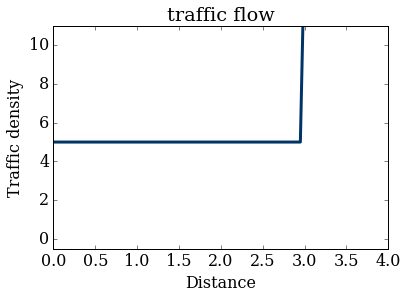

In [4]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.title('traffic flow')
pyplot.ylim(-0.5, 11.);

In [ ]:
def computeF(u_max, rho_max, rho):
    return u_max*rho*(1-rho/rho_max)

In [ ]:
from matplotlib import animation
from IPython.display import HTML

In [ ]:
def animate(data):
    x=numpy.linspace(0, 4, nx)
    y= data
    line.set_data(x,y)
    return line,

In [ ]:
def laxfriedrichs(rho, nt, dt, dx, rho_max, u_max):
   
    rho_n = numpy.zeros((nt,len(rho)))      

    rho_n[:,:] = rho.copy()              
   
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:-1] = .5*(rho[2:]+rho[:-2]) - dt/(2*dx)*(F[2:]-F[:-2])
        rho_n[t,0] = rho[0] # boundary condition at x=0
        rho_n[t,-1] = rho[-1] # boundary condition at x=4
        rho = rho_n[t].copy()
        
    return rho_n

In [ ]:
sigma = 1.0
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = laxfriedrichs(rho, nt, dt, dx, rho_max, u_max)

In [ ]:
rho_n.shape

In [ ]:
rho_n

In [ ]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

In [ ]:
anim=animation.FuncAnimation(fig, animate, frames=rho_n, interval=100)
HTML(anim.to_html5_video())

In [ ]:
def Jacobian(u_max, rho_max, rho):
    return u_max*(1-2*rho/rho_max)

def laxwendroff(rho, nt, dt, dx, rho_max, u_max):
   
    rho_n = numpy.zeros((nt,len(rho)))      
   
    rho_n[:,:] = rho.copy()              
    

    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        J = Jacobian(u_max, rho_max, rho)
        
        rho_n[t,1:-1] = rho[1:-1] - dt/(2*dx)*(F[2:]-F[:-2]) \
                           + dt**2/(4*dx**2) * ( (J[2:]+J[1:-1])*(F[2:]-F[1:-1]) \
                           - (J[1:-1]+J[:-2])*(F[1:-1]-F[:-2]) )
        
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()
        
    return rho_n

In [ ]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 1
dt = sigma*dt/u_max
rho_n = laxwendroff(rho, nt, dt, dx, rho_max, u_max)
dt

In [ ]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11.),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

In [ ]:
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())

In [ ]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 0.5
dt = sigma*dt/u_max
rho_n = laxwendroff(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())

In [ ]:
def maccormack(rho, nt, dt, dx, u_max, rho_max):
    rho_n = numpy.zeros((nt, len(rho)))
    rho_star = numpy.empty_like(rho)
    rho_n[:,:] = rho.copy()
    rho_star = rho.copy()
    
    for t in range (1, nt):
        F = computeF(u_max, rho_max, rho)
        rho_star[:-1]= rho[:-1]-dt/dx*(F[1:]-F[:-1])
        Fstar = computeF(u_max, rho_max, rho_star)
        rho_n[t, 1:]=.5*(rho[1:]+rho_star[1:]-dt/dx*(Fstar[1:]-Fstar[:-1]))
        rho=rho_n[t].copy()
    return rho_n

In [ ]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 0.5


dt = sigma*dx/u_max
rho_n = maccormack (rho, nt, dt, dx, u_max, rho_max)
anim = animation.FuncAnimation(fig, animate, frames = rho_n, interval=50)
HTML(anim.to_html5_video())

In [ ]:
exit